<a href="https://colab.research.google.com/github/yusuky1120/competition1/blob/main/competetion01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
# データの読み込み方がわからない方は、別途配布している、Notionの「Google Colabの使用方法」をご覧ください。
path =  '/content/drive/MyDrive/Colab Notebooks/GCI_summer/02.コンペ1（5-20公開済）/'

df = pd.read_csv(path + 'data/train.csv')
df_test = pd.read_csv(path + 'data/test.csv')

In [ ]:
#prepared
age = pd.concat([df['Age'], df_test['Age']])
fare = pd.concat([df['Fare'], df_test['Fare']])

df['Age'].fillna(age.mean(), inplace=True)
df_test['Age'].fillna(age.mean(), inplace=True)

df['Fare'].fillna(fare.mean(), inplace=True)
df_test['Fare'].fillna(fare.mean(), inplace=True)

df.isnull().sum()

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Family'] = df['SibSp'] + df['Parch']
df_test['Family'] = df_test['SibSp'] + df_test['Parch']

df.head(10)

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,1,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
5,6,1,3,"Moran, Mr. James",male,29.881138,0,0,330877,8.4583,NaN,Q,0
6,7,1,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0
7,8,1,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,4
8,9,0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,2
9,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1


In [ ]:
df['HasFamily'] = (df['Family'] > 0).astype(int)
df_test['HasFamily'] = (df_test['Family'] > 0).astype(int)


In [ ]:
#df.drop('Family', axis=1, inplace=True)
#df_test.drop('Family', axis=1, inplace=True)

#df.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasFamily,Title
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,NaN
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,NaN
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,NaN
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr


In [ ]:
# 敬称を抽出する
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\.', expand=False)
df_test['Title'] = df_test['Name'].str.extract(r',\s*([^\.]*)\.', expand=False)
df.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,HasFamily,Title
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,Mr
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,Mrs
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,Miss
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,Mrs
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Mr


In [ ]:
target_titles = ['Mr', 'Dr', 'Capt','Jonkheer','Don','Rev']
target_titles_test = ['Mr', 'Dr', 'Capt','Jonkheer','Don','Rev']
df['Title'] = df['Title'].where(df['Title'].isin(target_titles))
df_test['Title'] = df_test['Title'].where(df_test['Title'].isin(target_titles_test))
df.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,HasFamily,Title
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,Mr
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,NaN
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,NaN
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,NaN
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Mr


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Fareの対数変換
df['Fare_log'] = np.log1p(df['Fare'])
df_test['Fare_log'] = np.log1p(df_test['Fare'])

df.drop('Fare', axis=1, inplace=True)
df_test.drop('Fare', axis=1, inplace=True)

In [ ]:
#年齢分類
df['IsChild'] = (df['Age'] < 10).astype(int)
df_test['IsChild'] = (df_test['Age'] < 10).astype(int)
df.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Family,HasFamily,Title,Fare_log,IsChild
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,1,1,Mr,2.110213,0
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C,1,1,NaN,4.280593,0
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S,0,0,NaN,2.188856,0
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S,1,1,NaN,3.990834,0
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S,0,0,Mr,2.202765,0


In [ ]:
# Cabin が欠損かどうかでグループ分け
df['HasCabin'] = df['Cabin'].notnull()
df_test['HasCabin'] = df_test['Cabin'].notnull()

# 生存率から死亡率を計算（1 - mean）
#death_rate_by_cabin_info = df.groupby('HasCabin')['Perished'].apply(lambda x: 1 - x.mean())

# 表示
#print(death_rate_by_cabin_info)


In [ ]:
#df.groupby('HasCabin')['Pclass'].value_counts()

In [ ]:
df['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

df.isnull().sum()

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Cabin,687


In [ ]:
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Embarked,0


In [ ]:
df.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

df.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked', 'Family', 'HasFamily', 'Title', 'Fare_log', 'IsChild',
       'HasCabin'],
      dtype='object')

In [ ]:
df.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
df_test.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

df.head()

,PassengerId,Perished,Pclass,Sex,Age,SibSp,Parch,Embarked,Family,HasFamily,Title,Fare_log,IsChild,HasCabin
0,1,1,3,0,22.0,1,0,S,1,1,Mr,2.110213,0,False
1,2,0,1,1,38.0,1,0,C,1,1,NaN,4.280593,0,True
2,3,0,3,1,26.0,0,0,S,0,0,NaN,2.188856,0,False
3,4,0,1,1,35.0,1,0,S,1,1,NaN,3.990834,0,True
4,5,1,3,0,35.0,0,0,S,0,0,Mr,2.202765,0,False


In [ ]:
embarked = pd.concat([df['Embarked'], df_test['Embarked']])

embarked_ohe = pd.get_dummies(embarked)

embarked_ohe_train = embarked_ohe[:891]
embarked_ohe_test = embarked_ohe[891:]

df = pd.concat([df, embarked_ohe_train], axis=1)
df_test = pd.concat([df_test, embarked_ohe_test], axis=1)

df.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

df.head()

,PassengerId,Perished,Pclass,Sex,Age,SibSp,Parch,Family,HasFamily,Title,Fare_log,IsChild,HasCabin,C,Q,S
0,1,1,3,0,22.0,1,0,1,1,Mr,2.110213,0,False,False,False,True
1,2,0,1,1,38.0,1,0,1,1,NaN,4.280593,0,True,True,False,False
2,3,0,3,1,26.0,0,0,0,0,NaN,2.188856,0,False,False,False,True
3,4,0,1,1,35.0,1,0,1,1,NaN,3.990834,0,True,False,False,True
4,5,1,3,0,35.0,0,0,0,0,Mr,2.202765,0,False,False,False,True


In [ ]:
df['HasTitle'] = df['Title'].notnull().astype(int)
df_test['HasTitle'] = df_test['Title'].notnull().astype(int)

df.drop(columns=['Title'], inplace=True)
df_test.drop(columns=['Title'], inplace=True)

print(df.head())

   PassengerId  Perished  Pclass  Sex   Age  SibSp  Parch  Family  HasFamily  \
0            1         1       3    0  22.0      1      0       1          1   
1            2         0       1    1  38.0      1      0       1          1   
2            3         0       3    1  26.0      0      0       0          0   
3            4         0       1    1  35.0      1      0       1          1   
4            5         1       3    0  35.0      0      0       0          0   

   Fare_log  IsChild  HasCabin      C      Q      S  HasTitle  
0  2.110213        0     False  False  False   True         1  
1  4.280593        0      True   True  False  False         0  
2  2.188856        0     False  False  False   True         0  
3  3.990834        0      True  False  False   True         0  
4  2.202765        0     False  False  False   True         1  


In [ ]:
df.drop(columns=['HasCabin'], inplace=True)
df_test.drop(columns=['HasCabin'], inplace=True)
#df.head()

In [ ]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Family,HasFamily,Fare_log,IsChild,C,Q,S,HasTitle
0,892,3,0,34.5,0,0,0,0,2.178064,0,False,True,False,1
1,893,3,1,47.0,1,0,1,1,2.079442,0,False,False,True,0
2,894,2,0,62.0,0,0,0,0,2.369075,0,False,True,False,1
3,895,3,0,27.0,0,0,0,0,2.268252,0,False,False,True,1
4,896,3,1,22.0,1,1,2,1,2.586824,0,False,False,True,0


In [ ]:
df.drop(columns=['Family'], inplace=True)
df_test.drop(columns=['Family'], inplace=True)

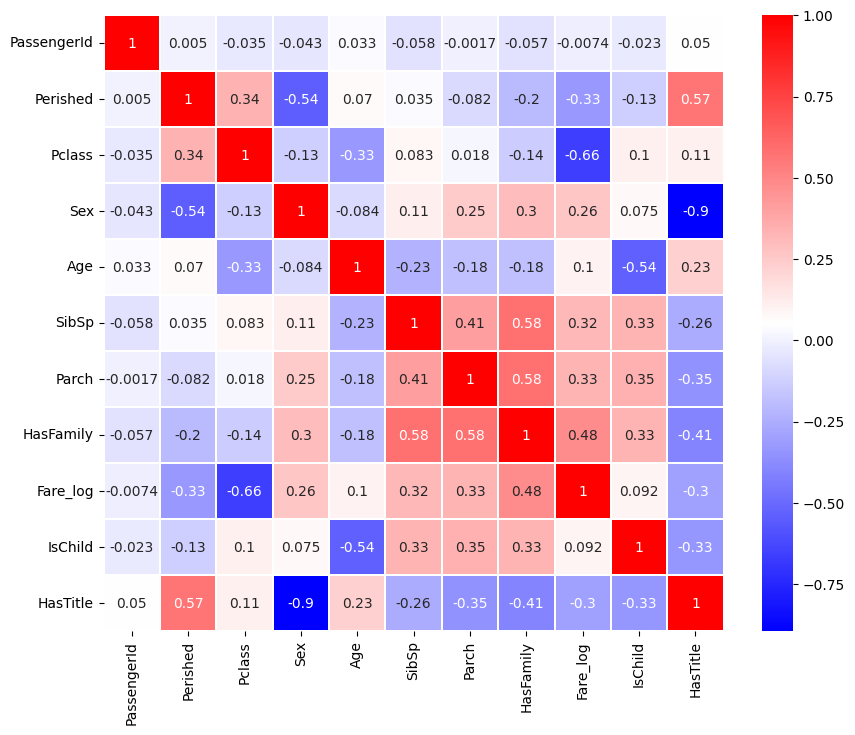

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=True,cmap='bwr',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [ ]:
#df.drop(columns=['Family'], inplace=True)
#df_test.drop(columns=['Family'], inplace=True)

#df.drop(columns=['Family'], inplace=True)
#df_test.drop(columns=['Family'], inplace=True)

#df.drop(columns=['Family'], inplace=True)
#df_test.drop(columns=['Family'], inplace=True)

KeyError: "['Family'] not found in axis"

In [ ]:
#model_create
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

X_test = df_test.iloc[:, 1:].values

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# 1. XGBoostモデル
xgb_model = xgb.XGBClassifier(
    max_depth=3, min_samples_leaf=1, n_estimators=50, n_jobs=-1, random_state=4
)
xgb_model.fit(X_train, y_train)

# 2. LightGBMモデル
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 392, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.629213 -> initscore=0.528844
[LightGBM] [Info] Start training from score 0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(max_depth=4, random_state=42)

In [ ]:
#grid_search
param_grid = {'max_depth' : [15,17,19],
              'min_child_samples' : [5,7,9]}

for max in param_grid['max_depth']:
  for min in param_grid['min_child_samples']:
    model2 = lgb.LGBMClassifier(max_depth=max, min_child_samples=min, n_estimators=50, n_jobs=-1, random_state=4)
    model2.fit(X_train, y_train)
    print('max_depth: {}, min_samples_leaf: {}'.format(max, min))
    print('Train Score: {}, Test Score: {}'.format(round(model2.score(X_train, y_train), 3),
                                                           round(model2.score(X_valid, y_valid), 3)))

[LightGBM] [Info] Number of positive: 392, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.629213 -> initscore=0.528844
[LightGBM] [Info] Start training from score 0.528844
max_depth: 15, min_samples_leaf: 5
Train Score: 0.96, Test Score: 0.806
[LightGBM] [Info] Number of positive: 392, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train 

In [ ]:
#grid_search
param_grid = {'max_depth' : [3,5,7],
              'min_samples_leaf' : [1,2,4]}

for max in param_grid['max_depth']:
  for min in param_grid['min_samples_leaf']:
    model = xgb.XGBClassifier(max_depth=max, min_samples_leaf=min, n_estimators=50, n_jobs=-1, random_state=4)
    model.fit(X_train, y_train)
    print('max_depth: {}, min_samples_leaf: {}'.format(max, min))
    print('Train Score: {}, Test Score: {}'.format(round(model.score(X_train, y_train), 3),
                                                           round(model.score(X_valid, y_valid), 3)))

max_depth: 3, min_samples_leaf: 1
Train Score: 0.91, Test Score: 0.847
max_depth: 3, min_samples_leaf: 2
Train Score: 0.91, Test Score: 0.847
max_depth: 3, min_samples_leaf: 4
Train Score: 0.91, Test Score: 0.847
max_depth: 5, min_samples_leaf: 1
Train Score: 0.952, Test Score: 0.791
max_depth: 5, min_samples_leaf: 2
Train Score: 0.952, Test Score: 0.791
max_depth: 5, min_samples_leaf: 4
Train Score: 0.952, Test Score: 0.791
max_depth: 7, min_samples_leaf: 1
Train Score: 0.97, Test Score: 0.802
max_depth: 7, min_samples_leaf: 2
Train Score: 0.97, Test Score: 0.802
max_depth: 7, min_samples_leaf: 4
Train Score: 0.97, Test Score: 0.802


In [ ]:
# === XGBoost ===
xgb_train_pred = xgb_model.predict(X_train)
xgb_valid_pred = xgb_model.predict(X_valid)

xgb_train_acc = accuracy_score(y_train, xgb_train_pred)
xgb_valid_acc = accuracy_score(y_valid, xgb_valid_pred)

# === rfc ===
rfc_train_pred = rfc.predict(X_train)
rfc_valid_pred = rfc.predict(X_valid)

rfc_train_acc = accuracy_score(y_train, rfc_train_pred)
rfc_valid_acc = accuracy_score(y_valid, rfc_valid_pred)

# === アンサンブル ===
xgb_train_proba = xgb_model.predict_proba(X_train)
rfc_train_proba = rfc.predict_proba(X_train)
ensemble_train_pred = np.argmax((4*xgb_train_proba + rfc_train_proba) / 5, axis=1)
ensemble_train_acc = accuracy_score(y_train, ensemble_train_pred)

xgb_valid_proba = xgb_model.predict_proba(X_valid)
rfc_valid_proba = rfc.predict_proba(X_valid)
ensemble_valid_pred = np.argmax((4*xgb_valid_proba + rfc_valid_proba) / 5, axis=1)
ensemble_valid_acc = accuracy_score(y_valid, ensemble_valid_pred)

# === 結果表示 ===
print("==== 精度比較 ====")
print(f"XGBoost    : Train = {xgb_train_acc:.4f} | Valid = {xgb_valid_acc:.4f}")
print(f"LightGBM   : Train = {rfc_train_acc:.4f} | Valid = {rfc_valid_acc:.4f}")
print(f"Ensemble   : Train = {ensemble_train_acc:.4f} | Valid = {ensemble_valid_acc:.4f}")


==== 精度比較 ====
XGBoost    : Train = 0.9101 | Valid = 0.8470
LightGBM   : Train = 0.8315 | Valid = 0.8209
Ensemble   : Train = 0.8973 | Valid = 0.8396


In [ ]:
pred = xgb_model.predict_proba(X_test)
pred = pred.argmax(axis=1)

In [ ]:
#以下rfcの実装

In [ ]:
rfc = RandomForestClassifier(max_depth=3, min_samples_leaf=1, n_estimators=150, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=150, n_jobs=-1,
                       random_state=42)

In [ ]:
#grid_search
param_grid = {'max_depth' : [3,5,7],
              'min_samples_leaf' : [1,2,4]}

for max in param_grid['max_depth']:
  for min in param_grid['min_samples_leaf']:
    rfc = RandomForestClassifier(max_depth=max, min_samples_leaf=min, n_estimators=100, n_jobs=-1, random_state=4)
    rfc.fit(X_train, y_train)
    print('max_depth: {}, min_samples_leaf: {}'.format(max, min))
    print('Train Score: {}, Test Score: {}'.format(round(rfc.score(X_train, y_train), 3),
                                                           round(rfc.score(X_valid, y_valid), 3)))

max_depth: 3, min_samples_leaf: 1
Train Score: 0.833, Test Score: 0.828
max_depth: 3, min_samples_leaf: 2
Train Score: 0.836, Test Score: 0.828
max_depth: 3, min_samples_leaf: 4
Train Score: 0.835, Test Score: 0.825
max_depth: 5, min_samples_leaf: 1
Train Score: 0.873, Test Score: 0.828
max_depth: 5, min_samples_leaf: 2
Train Score: 0.868, Test Score: 0.825
max_depth: 5, min_samples_leaf: 4
Train Score: 0.868, Test Score: 0.825
max_depth: 7, min_samples_leaf: 1
Train Score: 0.9, Test Score: 0.813
max_depth: 7, min_samples_leaf: 2
Train Score: 0.883, Test Score: 0.81
max_depth: 7, min_samples_leaf: 4
Train Score: 0.873, Test Score: 0.817


In [ ]:
#cross_validation
rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42), param_grid, cv=5)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2}
CV Score: 0.835


In [ ]:
#RFC
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

X_test = df_test.iloc[:, 1:].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

rfc = RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

print('Train Score: {}'.format(round(rfc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfc.score(X_valid, y_valid), 3)))

Train Score: 0.867
 Test Score: 0.825


In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

print('Logistic Regression \n')
print('Train Score: {}'.format(round(lr.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(lr.score(X_valid, y_valid), 3)))

Logistic Regression 

Train Score: 0.827
 Test Score: 0.821


In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 50, 10), random_state=0)
mlpc.fit(X_train, y_train)

print('Multilayer Perceptron \n')
print('Train Score: {}'.format(round(mlpc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(mlpc.score(X_valid, y_valid), 3)))

Multilayer Perceptron 

Train Score: 0.843
 Test Score: 0.821


In [ ]:
#pred = rfc.predict_proba(X_test)
#pred = pred.argmax(axis=1)

In [ ]:
rfc_pred = rfc.predict_proba(X_test)
lr_pred = lr.predict_proba(X_test)
mlpc_pred = mlpc.predict_proba(X_test)

pred_proba = (rfc_pred + lr_pred + mlpc_pred) / 3
pred = pred_proba.argmax(axis=1)

In [ ]:
#ダウンロード

In [ ]:
 # 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
path =  '/content/drive/MyDrive/Colab Notebooks/GCI_summer/02.コンペ1（5-20公開済）/'

submission = pd.read_csv(path + 'gender_submission.csv')
submission

,PassengerId,Perished
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [ ]:
pred.shape

(418,)

In [ ]:
submission['Perished'] = pred
submission

,PassengerId,Perished
0,892,1
1,893,1
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [ ]:
# JupyterLabなどローカルで作業する場合
# パスは必要に応じて変更の必要あり
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/GCI_summer/02.コンペ1（5-20公開済）/submission.csv', index=False)

In [ ]:
# Google Drive・Google Colaboratoryで作業する場合
submission.to_csv('submission.csv',index=False)

from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>